# **Regression Analysis of Bike Rentals | STATSMODEL BUILDING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Sangeeth N\Downloads\day (1).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
map_scn = { 1 : 'Spring',
          2 : 'Summer',
          3 : 'Fall',
          4 : 'Winter'}
df['season'] = df['season'].map(map_scn)

In [5]:
status = pd.get_dummies(df['season'], drop_first = True) # drop one feature

status = status.astype('int')

df = pd.concat([df, status], axis = 1)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [6]:
#sns.pairplot(df)

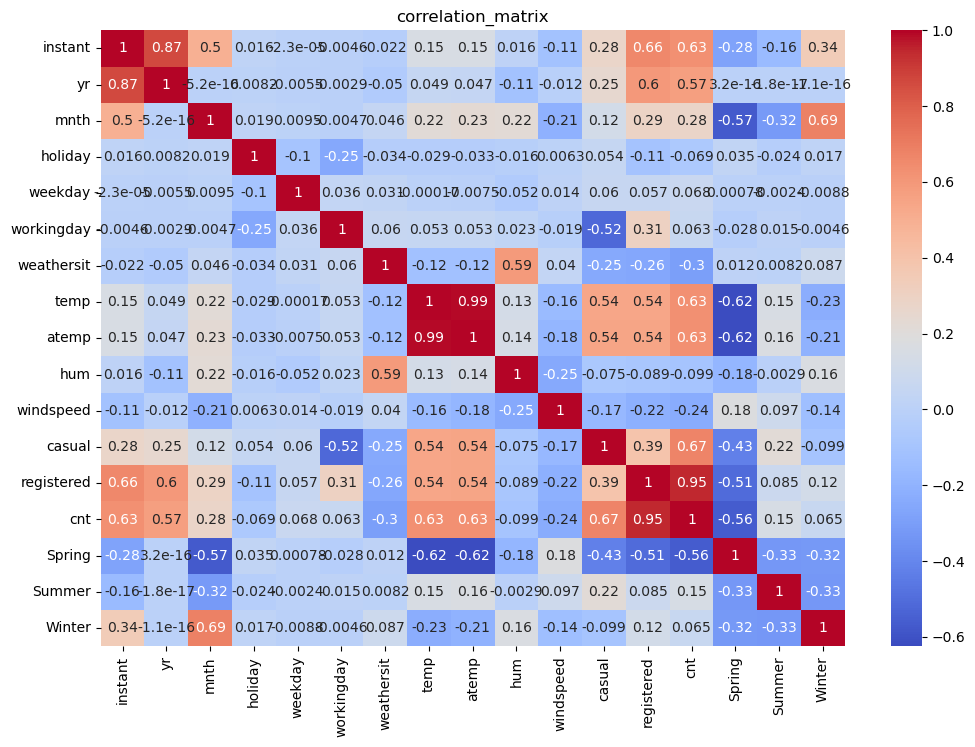

In [7]:
numerical_data = df.select_dtypes(include=['int', 'float'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation_matrix')
plt.show()

In [8]:
df.drop(['casual','registered','atemp','dteday','season'], axis = 1, inplace = True)

In [9]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp','hum','windspeed','cnt']

df[num_vars] = scaler.fit_transform(df[num_vars])

df.tail()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
725,726,1,12,0,4,1,2,0.243025,0.671380,0.675656,0.240681,1,0,0
726,727,1,12,0,5,1,2,0.241986,0.606684,0.274350,0.353543,1,0,0
727,728,1,12,0,6,0,2,0.241986,0.774208,0.210260,0.151749,1,0,0
728,729,1,12,0,0,0,1,0.245101,0.497001,0.676936,0.204096,1,0,0
729,730,1,12,0,1,1,2,0.195259,0.593830,0.273062,0.311436,1,0,0


In [22]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 50)

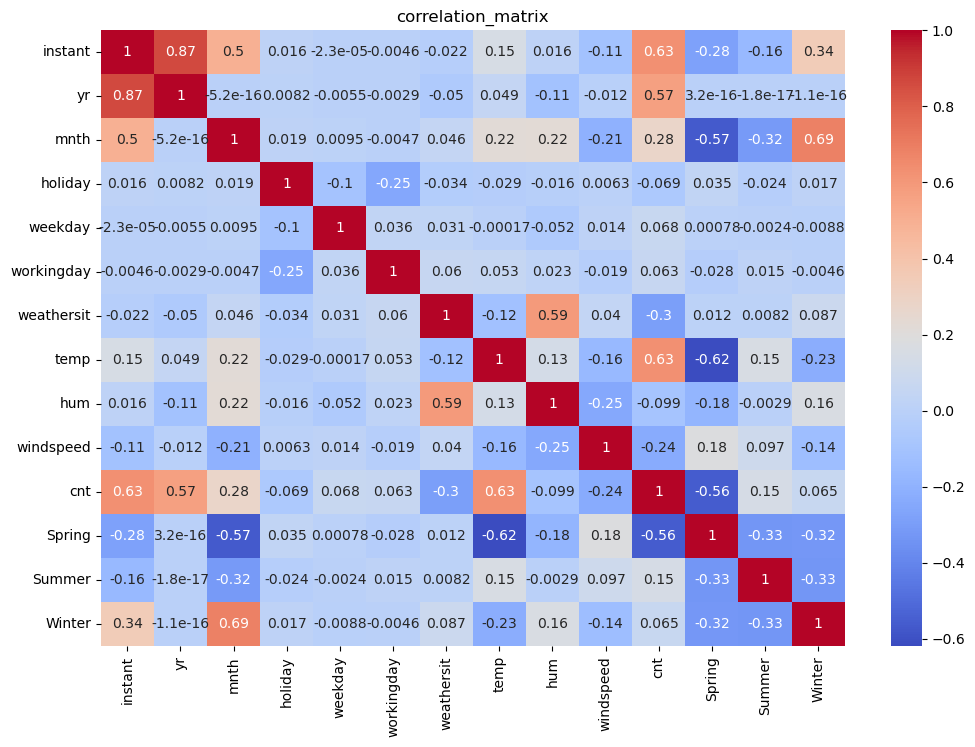

In [23]:
numerical_data = df.select_dtypes(include=['int', 'float'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation_matrix')
plt.show()

In [24]:
y_train = df_train.pop('cnt')

x_train = df_train

# Adding one by one

In [25]:
import statsmodels.api as sm

In [26]:
# Test 01

x_train_sm = sm.add_constant(x_train[['instant']])

lr = sm.OLS(y_train, x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     371.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           2.32e-64
Time:                        14:24:19   Log-Likelihood:                 187.43
No. Observations:                 584   AIC:                            -370.9
Df Residuals:                     582   BIC:                            -362.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2755      0.014     19.173      0.0

In [15]:
# Test 02
x_train_sm = sm.add_constant(x_train[['instant','temp']])

lr = sm.OLS(y_train, x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     663.8
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          8.70e-151
Time:                        14:17:45   Log-Likelihood:                -4906.3
No. Observations:                 584   AIC:                             9819.
Df Residuals:                     581   BIC:                             9832.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -281.9477    142.327     -1.981      0.0

In [16]:
# Test 04
x_train_sm = sm.add_constant(x_train[['instant','temp','yr']])

lr = sm.OLS(y_train, x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     479.8
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.23e-156
Time:                        14:17:45   Log-Likelihood:                -4889.3
No. Observations:                 584   AIC:                             9787.
Df Residuals:                     580   BIC:                             9804.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -97.0175    141.886     -0.684      0.4

In [28]:
# Test 05
x_train_sm = sm.add_constant(x_train[['instant','temp','yr','mnth']])

lr = sm.OLS(y_train, x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     365.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          9.63e-157
Time:                        14:25:47   Log-Likelihood:                 411.08
No. Observations:                 584   AIC:                            -812.2
Df Residuals:                     579   BIC:                            -790.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.018      0.149      0.8

In [29]:
# Test 05
x_train_sm = sm.add_constant(x_train[['instant','temp','yr','mnth','Summer']])

lr = sm.OLS(y_train, x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          8.10e-161
Time:                        14:26:24   Log-Likelihood:                 423.63
No. Observations:                 584   AIC:                            -835.3
Df Residuals:                     578   BIC:                            -809.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.018     -0.778      0.4

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [31]:
def vif_con(x_train):
    vif = pd.DataFrame()
    vif['Features'] = x_train.columns
    vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range (x_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [32]:
vf = vif_con(x_train)
vf

,Features,VIF
0,instant,2225.26
1,yr,825.41
2,mnth,635.47
8,hum,33.65
7,temp,15.48
6,weathersit,13.06
9,windspeed,5.97
12,Winter,4.38
10,Spring,4.06
5,workingday,3.55


In [33]:
# check p value:
# 1st priyority p value:
x_train_vf = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_vf).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.22e-210
Time:                        14:26:42   Log-Likelihood:                 563.64
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     570   BIC:                            -1038.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3515      0.038      9.310      0.0

In [34]:
# Drop the variable:

x_train = x_train.drop(['mnth'],axis = 1)


In [35]:
vf = vif_con(x_train)
vf

,Features,VIF
0,instant,48.25
7,hum,33.55
1,yr,20.62
6,temp,14.68
5,weathersit,13.05
8,windspeed,5.96
11,Winter,4.21
9,Spring,3.90
4,workingday,3.55
3,weekday,3.25


In [36]:
# check p value:
# 1st priyority p value:
x_train_vf = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_vf).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.11e-211
Time:                        14:27:22   Log-Likelihood:                 562.22
No. Observations:                 584   AIC:                            -1098.
Df Residuals:                     571   BIC:                            -1042.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3677      0.037     10.066      0.0

In [37]:
# Drop the variable:

x_train = x_train.drop(['instant'],axis = 1)


In [38]:
vf = vif_con(x_train)
vf

,Features,VIF
6,hum,31.51
5,temp,13.42
4,weathersit,13.04
7,windspeed,5.86
8,Spring,3.60
3,workingday,3.54
2,weekday,3.20
10,Winter,2.85
9,Summer,2.18
0,yr,1.99


In [39]:
# check p value:
# 1st priyority p value:
x_train_vf = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_vf).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     253.9
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          7.56e-212
Time:                        14:28:24   Log-Likelihood:                 560.81
No. Observations:                 584   AIC:                            -1098.
Df Residuals:                     572   BIC:                            -1045.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3457      0.034     10.136      0.0

In [40]:
# Drop the variable:

x_train = x_train.drop(['workingday'],axis = 1)

In [41]:
vf = vif_con(x_train)
vf

,Features,VIF
5,hum,31.47
3,weathersit,12.97
4,temp,12.87
6,windspeed,5.86
7,Spring,3.50
2,weekday,3.20
9,Winter,2.77
8,Summer,2.15
0,yr,1.99
1,holiday,1.04


In [42]:
# check p value:
# 1st priyority p value:
x_train_vf = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_vf).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     278.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.85e-212
Time:                        14:29:17   Log-Likelihood:                 559.34
No. Observations:                 584   AIC:                            -1097.
Df Residuals:                     573   BIC:                            -1049.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3532      0.034     10.425      0.0

# FIND RFE:

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 5)
rfe = rfe.fit(x_train, y_train)

In [45]:
list(zip (x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('weekday', False, 6),
 ('weathersit', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 5),
 ('Winter', False, 4)]

In [46]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'Spring'], dtype='object')

In [47]:
x_train = x_train[col]


In [48]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train)

lm = sm.OLS(y_train, x_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     455.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.06e-197
Time:                        14:34:53   Log-Likelihood:                 509.58
No. Observations:                 584   AIC:                            -1007.
Df Residuals:                     578   BIC:                            -980.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4904      0.029     17.085      0.0

# **Linear model**

In [53]:
x1 = df[['instant','temp','yr','mnth','Summer']]

y1 = df['cnt']

In [54]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.2, random_state = 42)

In [55]:
# Linear Regression model building:

model_1 = LinearRegression()
model_1.fit(x1_train,y1_train)

LinearRegression()

In [56]:
y1_pred = model_1.predict(x1_test)

y1_pred_train = model_1.predict(x1_train)

In [57]:
# Find R2 value test & train data:
from sklearn.metrics import mean_squared_error, r2_score

R2 = r2_score(y1_test,y1_pred)
R2_train = r2_score(y1_train,y1_pred_train)

print('MODEL_1 : R2 score in test data  : ', R2,'\n')
print('MODEL_1 : R2 score in train data : ', R2_train)

MODEL_1 : R2 score in test data  :  0.7880569066119401 

MODEL_1 : R2 score in train data :  0.705988159146623
